In [1]:
import pandas as pd
import numpy as np
import random
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics.pairwise import cosine_similarity
import operator

In [2]:
# 데이터 불러오기
import pandas as pd
total = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/total_final.csv',index_col=0)

In [3]:
# 대분류 카테고리 합치기
total['대분류']=total['대분류'].replace(['가공식품','신선식품'],'식품')
total['대분류']=total['대분류'].replace(['의류','패션잡화'],'의류')
total['대분류']=total['대분류'].replace(['전문스포츠/레저','교육/문화용품'],'취미')
total['대분류']=total['대분류'].replace(['디지털/가전','가구/인테리어'],'주거')
total['대분류'].unique()

array(['일상용품', '식품', '취미', '의류', '주거', '음식점', '의약품/의료기기', '기타'],
      dtype=object)

In [4]:
# 식품 일상용품 데이터 뽑기
total1=total[total['대분류'].isin(['식품','일상용품'])].reset_index(drop=True)

In [5]:
# 필요한 데이터 그룹화
df = total1.groupby(['고객번호','소분류코드','소분류명','구매일자','영수증번호']).agg(구매횟수=('영수증번호','nunique'))
df.reset_index(inplace=True)
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
0,1,A010101,위생세제,20140130,1307657,1
1,1,A010101,위생세제,20140228,1456379,1
2,1,A010101,위생세제,20140919,2751160,1
3,1,A010101,위생세제,20150327,3960475,1
4,1,A010101,위생세제,20151130,5602223,1
...,...,...,...,...,...,...
25587852,19383,D080204,아이섀도우,20151206,240284,1
25587853,19383,D080205,메이크업세트,20150815,237806,1
25587854,19383,D080302,립글로즈/틴트,20151206,240283,1
25587855,19383,D080302,립글로즈/틴트,20151206,240284,1


In [6]:
# 구매감소모델 돌린결과 감소고객 리스트 뽑기
pred = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/cluster.csv',index_col=0)
pred

,고객번호,성별,연령대,Recency_R,구매횟수_F,구매금액_M,연평균성장률,식품구매비중,식품_방문지수,고가_방문지수,유형,실루엣계수
0,1,0,6,1,5,5,-0.259681,0.148453,0.6,-0.2,2,0.335040
1,2,0,6,2,4,5,-0.033423,0.153350,-2.4,0.4,2,0.148630
2,7,1,6,2,2,5,-1.763857,0.111419,-1.4,0.0,2,0.185036
3,10,1,6,3,5,3,-0.259288,0.694089,0.0,0.6,4,0.216958
4,11,0,6,4,3,5,-1.869347,0.127777,0.4,-0.2,2,0.238485
...,...,...,...,...,...,...,...,...,...,...,...,...
9019,19314,1,4,1,3,5,-1.194635,0.041125,-0.2,0.4,2,0.392426
9020,19325,1,4,2,3,3,-0.906757,0.352661,2.8,1.6,0,0.198347
9021,19327,0,5,1,5,1,-0.953285,0.878719,-2.2,1.6,4,0.123898
9022,19333,1,2,2,4,1,-1.377282,0.919496,-1.0,1.2,4,0.201445


In [7]:
# 온라인 유무고객 리스트 뽑기
predict = pd.read_csv('/content/drive/MyDrive/2차프로젝트 공유폴더/프로젝트데이터셋/prediction1.csv',index_col=0)
predict=predict.reset_index()
predict=predict[predict['온라인유무'] == 1]
predict=predict[['고객번호','온라인유무']]
predict

,고객번호,온라인유무
5,7,1
12,14,1
40,42,1
72,74,1
92,94,1
...,...,...
18843,19312,1
18844,19313,1
18847,19316,1
18851,19320,1


In [8]:
# 대상 고객번호 뽑기
pred=pd.merge(pred,predict)
cus_id=pred['고객번호'].tolist()

In [9]:
# 대상 고객번호 삽입
df=df[df['고객번호'].isin(cus_id)]
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
5962,7,A010101,위생세제,20151105,5439051,1
5963,7,A010103,뷰티상품,20141201,3221606,1
5964,7,A010201,우육,20141030,3004964,1
5965,7,A010201,우육,20150114,3515054,1
5966,7,A010201,우육,20150308,3838330,1
...,...,...,...,...,...,...
25535607,19333,D040109,쿠키,20150925,203167,1
25535608,19333,D040201,생수,20150424,202911,1
25535609,19333,D040201,생수,20151112,230105,1
25535610,19333,D040209,기타기능성음료,20150123,224369,1


In [10]:
# 2015년 데이터만 추출
df=df.query('구매일자 > 20141231 and 구매일자 <20151232')
df.reset_index(inplace=True,drop=True)
df

,고객번호,소분류코드,소분류명,구매일자,영수증번호,구매횟수
0,7,A010101,위생세제,20151105,5439051,1
1,7,A010201,우육,20150114,3515054,1
2,7,A010201,우육,20150308,3838330,1
3,7,A010201,우육,20150327,3956942,1
4,7,A010201,우육,20150427,4182295,1
...,...,...,...,...,...,...
2011004,19333,D040109,쿠키,20150925,203167,1
2011005,19333,D040201,생수,20150424,202911,1
2011006,19333,D040201,생수,20151112,230105,1
2011007,19333,D040209,기타기능성음료,20150123,224369,1


In [11]:
# 10월 이전 이후로 데이터 나누기
df_year_round = df[df['구매일자'] < 20151001]
df_year_end = df[df['구매일자'] > 20150930]

In [12]:
# 점수를 매기기위해 그룹화
uir_df=df_year_round.groupby(['고객번호','소분류명'])['영수증번호'].nunique().reset_index()
uir_df

,고객번호,소분류명,영수증번호
0,7,N/B골프의류,1
1,7,가공우유,1
2,7,가정용화장지,1
3,7,간식용소시지,2
4,7,감자,1
...,...,...,...
530666,19333,하드캔디,16
530667,19333,한식델리,2
530668,19333,햄,1
530669,19333,헬스건강,3


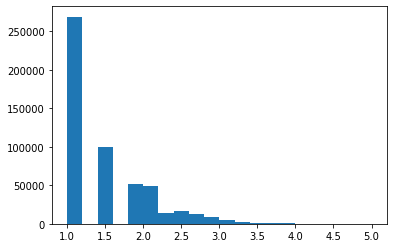

In [13]:
# 정규화후 1~5 사이의 점수로 변환한다.
import numpy as np
uir_df['점수'] = uir_df['영수증번호'].apply(lambda x: np.log10(x)+1)
uir_df['점수'] = ((uir_df['점수'] - uir_df['점수'].min()) / 
                    (uir_df['점수'].max() - uir_df['점수'].min()) * 4) + 1
uir_df['점수'].hist(bins=20, grid=False)

In [ ]:
uir_df

,고객번호,소분류명,영수증번호,점수
0,7,N/B골프의류,1,1.000000
1,7,가공우유,1,1.000000
2,7,가정용화장지,1,1.000000
3,7,간식용소시지,2,1.507052
4,7,감자,1,1.000000
...,...,...,...,...
530666,19333,하드캔디,16,3.028206
530667,19333,한식델리,2,1.507052
530668,19333,햄,1,1.000000
530669,19333,헬스건강,3,1.803658


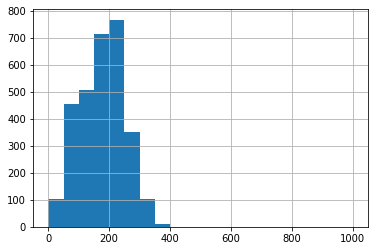

In [14]:
rating_per_user = uir_df.groupby('고객번호')['점수'].count()
statistics.mean(rating_per_user.tolist())
rating_per_user.hist(bins=20, range=(0,1000))

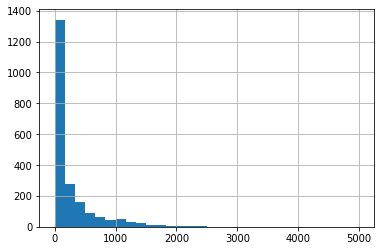

In [15]:
# 상품별 평가된 점수 등급
ratings_per_product = uir_df.groupby('소분류명')['점수'].count()
statistics.mean(ratings_per_product.tolist())

# 상품별 평가된 빈도
ratings_per_product.hist(bins=30, range=(0,5000))

In [ ]:
"""
# 너무 적게 평가된 상품 제거
ratings_per_product_df = pd.DataFrame(ratings_per_product)

# 평점 개수가 50개 이하 상품 제거
filtered_ratings_per_product_df = ratings_per_product_df[ratings_per_product_df.점수 >= 50]
print(filtered_ratings_per_product_df)

# df -> list
product = filtered_ratings_per_product_df.index.tolist()
"""

             점수
소분류명           
14K         192
4대 B/D      267
L/C 아웃도어    945
L/C골프의류     351
Local기타잎채소  302
...         ...
훼이셜클렌저      369
휴지통         120
흑미           52
흑미류         295
흰다리새우       523

[1286 rows x 1 columns]


In [ ]:
"""
# 너무 적게 평가한 유저 제거
rating_per_user_df = pd.DataFrame(rating_per_user)

# 평점 데이터 30개 이하일 경우 제거
filtered_rating_per_user_df = rating_per_user_df[rating_per_user_df.점수 >= 30]
print(filtered_rating_per_user_df)
rating_users = filtered_rating_per_user_df.index.tolist()
"""

        점수
고객번호      
7      122
14     127
74     101
123    170
138    191
...    ...
19268   70
19289  196
19293  194
19304   73
19333   53

[2998 rows x 1 columns]


In [ ]:
"""
uir_df=uir_df[uir_df['고객번호'].isin(rating_users)]
uir_df=uir_df[uir_df['소분류명'].isin(product)]
uir_df
"""

,고객번호,소분류명,영수증번호,점수
0,7,N/B골프의류,1,1.000000
1,7,가공우유,1,1.000000
2,7,가정용화장지,1,1.000000
3,7,간식용소시지,2,1.507052
4,7,감자,1,1.000000
...,...,...,...,...
530665,19333,파이,1,1.000000
530666,19333,하드캔디,16,3.028206
530667,19333,한식델리,2,1.507052
530668,19333,햄,1,1.000000


In [16]:
rating_matrix = uir_df.pivot_table(index='고객번호', columns='소분류명', values='점수')
rating_matrix

소분류명,14K,2단우산,3단우산,4대 B/D,5 ON THE GO,ACC Bloom (1F),ACC Bloom (3F),ANDZ,BB/파운데이션/컴팩트류,BON,...,훼이셜클렌저,휘트니스,휠라골프,휴대폰기타용품,휴지류,휴지통,흑미,흑미류,흰다리새우,히터
고객번호,,,,,,,,,,,,,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
19293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rating_matrix = rating_matrix.fillna(0)
rating_matrix.shape

(3015, 2125)

In [18]:
rating_matrix

소분류명,14K,2단우산,3단우산,4대 B/D,5 ON THE GO,ACC Bloom (1F),ACC Bloom (3F),ANDZ,BB/파운데이션/컴팩트류,BON,...,훼이셜클렌저,휘트니스,휠라골프,휴대폰기타용품,휴지류,휴지통,흑미,흑미류,흰다리새우,히터
고객번호,,,,,,,,,,,,,,,,,,,,,
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def similar_users(user_id, matrix, k=5):
    # 현재 유저에 대한 데이터프레임 만들기
    # matrix의 index = user_id -> 현재 1명 유저에 대한 평가 정보 찾기
    user = matrix[matrix.index == user_id]
    
    # matrix index 값이 user_id와 다른가?
    # 일치하지 않는 값들은 other_users
    other_users = matrix[matrix.index != user_id]
    
    # 대상 user, 다른 유저와의 cosine 유사도 계산 
    # list 변환
    similarities = cosine_similarity(user,other_users)[0].tolist()
    
    # 다른 사용자의 인덱스 목록 생성
    other_users_list = other_users.index.tolist()
    
    # 인덱스/유사도로 이뤄진 딕셔너리 생성
    # dict(zip()) -> {'other_users_list1': similarities, 'other_users_list2': similarities}
    user_similarity = dict(zip(other_users_list, similarities))
    
    # 딕셔너리 정렬
    # key=operator.itemgetter(1) -> 오름차순 정렬 -> reverse -> 내림차순
    user_similarity_sorted = sorted(user_similarity.items(), key=operator.itemgetter(1))
    user_similarity_sorted.reverse()
    
    # 가장 높은 유사도 k개 정렬하기
    top_users_similarities = user_similarity_sorted[:k]
    users = [i[0] for i in top_users_similarities]
    
    return users

In [21]:
def recommend_item(user_index, similar_user_indices, matrix, items=5):
    # 유저와 비슷한 유저 가져오기
    similar_users = matrix[matrix.index.isin(similar_user_indices)]
    # 비슷한 유저 평균 계산 # row 계산
    similar_users = similar_users.mean(axis=0)
    # dataframe 변환 
    similar_users_df = pd.DataFrame(similar_users, columns=['user_similarity'])

    # 현재 사용자의 벡터 가져오기 : matrix = rating_matrix(pivot table)
    user_df = matrix[matrix.index == user_index]

    # 현재 사용자의 평가 데이터 정렬
    user_df_transposed = user_df.transpose()

    # 컬럼명 변경 
    user_df_transposed.columns = ['rating']

    # 안산물건은 0로 바꾸어 준다. remove any rows without a 0 value. Anime not watched yet
    user_df_transposed = user_df_transposed[user_df_transposed['rating']==0]

    # 안산물건 목록리스트 만들기
    no_product = user_df_transposed.index.tolist()

    # 안산물건 필터링
    similar_users_df_filtered = similar_users_df[similar_users_df.index.isin(no_product)]

    # 평균값을 기준으로 내림차순 정렬
    similar_users_df_ordered = similar_users_df_filtered.sort_values(by=['user_similarity'], ascending=False)

    # 상위 5개 값 가져오기
    # items = 5
    top_n_product = similar_users_df_ordered.head(items)
    top_n_product_indices = top_n_product.index.tolist()

    
    return top_n_product_indices #items

## 시뮬레이션

In [22]:
# 10월 이후의 데이터 -> 테스트로 활용(2015년 4분기)
simulation_test_df = df_year_end.groupby(['고객번호','영수증번호'])['소분류명'].apply(set).reset_index()
simulation_test_df.columns = ['cus_id','receipt' ,'RealOrdered']
simulation_test_df

,cus_id,receipt,RealOrdered
0,7,420043,"{두부류, 기타냉장조리, 일반계란, 종량제봉투, 부침가루}"
1,7,5213358,{한식델리}
2,7,5213359,{디저트류}
3,7,5213360,{디저트류}
4,7,5213659,{에스닉푸드}
...,...,...,...
167974,19333,6936145,{차음료}
167975,19333,6936161,"{국내생수, 과일맛우유}"
167976,19333,6936185,"{체중조절용시리얼, 수입캔디}"
167977,19333,6936551,"{커피/초코우유, 차음료}"


In [73]:
# 고객번호 입력으로 유사고객 상품 찾아주는 함수
def find(user_id):
  similar_user_indices=similar_users(user_id,matrix=rating_matrix,k=5)
  recommend=recommend_item(user_id, similar_user_indices, rating_matrix)
  recommend=set(recommend)
  
  return recommend

In [ ]:
# 대상고객 
cus_list=uir_df['고객번호'].unique().tolist()

In [ ]:
# 고객번호와 추천상품 딕셔너리
b={}
for i in cus_list:
  a=find(i)
  b[i] = a

In [66]:
#시뮬레이션 결과 추가 함수
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        #sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return predicted_stock_dict
    else:
        return None

In [67]:
simulation_test_df['유사고객'] = simulation_test_df['cus_id']. \
                                            apply(lambda x: add_predicted_stock_set(x, b))
simulation_test_df.head()   

,cus_id,receipt,RealOrdered,유사고객
0,7,420043,"{두부류, 기타냉장조리, 일반계란, 종량제봉투, 부침가루}","{색조 화장품, 서양델리, 유기농채소, 음료, 즉석반찬}"
1,7,5213358,{한식델리},"{색조 화장품, 서양델리, 유기농채소, 음료, 즉석반찬}"
2,7,5213359,{디저트류},"{색조 화장품, 서양델리, 유기농채소, 음료, 즉석반찬}"
3,7,5213360,{디저트류},"{색조 화장품, 서양델리, 유기농채소, 음료, 즉석반찬}"
4,7,5213659,{에스닉푸드},"{색조 화장품, 서양델리, 유기농채소, 음료, 즉석반찬}"


In [69]:
# 구매 예측의 상위 k개의 recall(재현율)
def calculate_recall(real_order, predicted_order):
    # 만약 추천 대상 상품이 없다면, 10월 이후에 상품을 처음 구매하는 고객
    if predicted_order is None:
        return None
    
    predicted = predicted_order
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    # 예측한 상품 중, 실제로 유저가 구매한 상품의 비율 계산
    recall = true_positive / len(predicted)
    return recall

In [70]:
simulation_test_df['재현도'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['유사고객']
                                                                                 ), axis=1)

In [71]:
simulation_test_df['재현도'].mean()

0.005536406336506349

In [72]:
simulation_test_df.sample(20)

,cus_id,receipt,RealOrdered,유사고객,재현도
98869,10072,7680564,"{페트소주, 국산콩나물, OA용품, 기능성우유}","{파프리카, 샌드, 일반빵, 막걸리, 재사용봉투}",0.0
22171,3087,6618426,"{단감, 국산고등어, 무우, 냉장면류, 기능성우유, 규격소스류, 참치통조림, 완숙토...","{떠먹는요구르트, 기능성웰빙돼지고기, 콘스낵, 참외, 친환경채소(특약)}",0.0
118682,12319,10366044,"{과일맛우유, 단감, 찐빵, PB바나나, 어린이우유, 일반흰우유}","{기능성우유, 브랜드란, 콘스낵, 재사용봉투, 일반바나나}",0.0
17074,2616,5395812,{에스닉푸드},"{기초 화장품, 유기농채소, 냉동식품, 수입식품, 음료}",0.0
54900,6336,6398132,"{팽이버섯, 국산맥주, 페트소주, Local부추, 여성화장품}","{감자스낵, 떠먹는요구르트, 병소주, 크래커, 차별화계란}",0.0
33422,4172,474575,{샌드},"{팽이버섯류, 고구마, 방울토마토, 당근, 오렌지}",0.0
47569,5650,8044668,"{뉴질랜드골드키위, 사과기타, 연어회, 가공두부}","{혼합탄산, 어린이/액상요구르트, 참외, 방울토마토, 일반바나나}",0.0
135991,14418,5439792,{떡},"{기초 화장품, 일반계란, 샐러드류, 가공우유, 옥수수스낵}",0.0
39992,4868,312846,"{고구마, 파프리카/피망}","{복숭아, 기능성우유, 커피음료, 안전상비의약외품, 즉석밥}",0.0
116554,12099,305586,{일반계란},"{오징어, 파우치/즉석음료, 치즈, 생수, 쉘초콜릿}",0.0
